# SARIMA

$\operatorname{SARIMA}$ stands for 

- **S**easonal
- **A**uto 
- **R**egressive 
- **I**ntegrated 
- **M**oving
- **A**verage.

## What we will accomplish

In this notebook we will:
- Motivate the SARIMA model
- Give a precise specification of the model
- Discuss how to choose the hyperparamaters.
- Demonstrate how to fit a SARIMA model in python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from seaborn import set_style
set_style("whitegrid")

## Mathematical Motivation

Wold's Decomposition Theorem states that every covariance stationary time series $y_t$ with $\mathbb{E}(y_t) = 0$ can be decomposed as

$$
y_t =  \eta_t + \sum_{j=0}^{\infty} d_j \epsilon_{t-j}
$$

where 

- $\epsilon_{t} \sim \operatorname{NID}(0,\sigma^2)$
- $d_0 = 1$
- $\displaystyle \sum_0^\infty d_j^2$ is finite.
- $P(\eta_{t+s} | y_t, y_{t-1}, y_{t-2}, \dots) = \eta_{t+s}$ for all $s>0$

So $y_t$ can, in essense, be represented as an $\operatorname{MA}(\infty)$ process plus a "deterministic part" $\eta_t$.

A great exposition written by Prof. Lawrence Christiano can be found [here](lecture_7_assets/wold.pdf).

This is the theoretical justification for using $\operatorname{MA}(q)$ models, which are finite approximations.

 Although Wold's theorem says that we could always use $\operatorname{MA}(q)$, the value of $q$ might be quite large.  Estimating this many parameters might require a lot of data.  Wold's theorem also tells us that an $\operatorname{AR}(p)$ process can be written as an $\operatorname{MA}(\infty)$, but it is nicer to only estimate $p$ parameters than infinitely many parameters!  
 
 Including both $\operatorname{AR}(p)$ and $\operatorname{MA}(q)$ parts of our model can account for both types of behavior while limiting the number of parameters to be estimated.  This leads us to $\operatorname{ARMA}$ models.

## Autoregressive Moving Average (ARMA) models

Combining an $\text{AR}(p)$ and $\text{MA}(q)$ sequence gives an $\text{ARMA}(p,q)$ process, that is:

$$
y_t = \alpha_1 y_{t-1} + \dots + \alpha_{p} y_{t-p} + \epsilon_t + \beta_1 \epsilon_{t-1} + \dots + \beta_q \epsilon_{t-q}.
$$

From this we can see that if $p=0$, then we have a $\text{MA}(q)$ process, while if $q=0$ we have an $\text{AR}(p)$ process.

We will also introduce some additional notation which will make writing these things down a little easier.

Let $B$ be the backshift operator which takes a time series $t \mapsto y_t$ and returns the backshifted time series $t \mapsto y_{t-1}$. 

Then we can rewrite the $\operatorname{ARMA}$ model as

$$
(1 - \alpha_1 B - \alpha_2 B^2 - \dots - \alpha_p B^p)y_t = (1 + \beta_1 B + \dots + \beta_q B^q) \epsilon_t
$$

If the time series you are attempting to forecast <b>is not</b> stationary, it will not give a good fit or forecast in the long run. This leads to the **I** in the AR**I**MA model.

## Autoregressive Integrated Moving Average (ARIMA) models

An $\operatorname{ARIMA}(p,d,q)$ is 

$$
(1 - \alpha_1 B - \alpha_2 B^2 - \dots - \alpha_p B^p)(1-B)^d y_t = (1 + \beta_1 B + \dots + \beta_q B^q) \epsilon_t
$$
 
$1-B$ is the difference operator which takes $t \mapsto y_t$ and returns $t \mapsto y_{t} - y_{t-1}$.

So $(1-B)^d$ applies the difference operator $d$ times. 

We should choose $d$ so that the differenced time series appears stationary.

Sometimes we see some "seasonality" in our autocorrelation:  only lags which are multiples of a given $s$ appear significant. This leads us to the **S** in **S**ARIMA.

## SARIMA models

$\operatorname{SARIMA}((p,d,q),(P,D,Q,s))$ is 

$$
(1 - \mathfrak{a}_1 B^s - \mathfrak{a}_2 B^{2s} - \dots  - \mathfrak{a}_P B^{Ps})(1 - \alpha_1 B - \alpha_2 B^2 - \dots - \alpha_p B^p)(1-B^s)^D(1-B)^d y_t = (1 + \mathfrak{b}_1 B^s + \mathfrak{b}_2 B^{2s} + \dots  + \mathfrak{b}_Q B^{Qs})(1 + \beta_1 B + \dots + \beta_q B^q) \epsilon_t
$$

Let's write down an example $\operatorname{SARIMA}((0,0,0),(1,0,0,7))$ model in less awesome notation to get a feel for this.  

It is just

$$
(1 - \mathfrak{a}_1 B^7) y_t = \epsilon_t
$$

which translates to

$$
y_t = \mathfrak{a}_1 y_{t-7} + \epsilon_t
$$

In other words, the seasonal part of SARIMA only regresses on lags which are multiples of $s$.

### Simulating some ARIMA data

Let's generate some synthetic data which follows the $\operatorname{ARIMA}(2,1,2)$ process:

$$
y_t - y_{t-1} = 0.5y_{t-1} - 0.2y_{t-2} + \epsilon_{t} + 0.7\epsilon_{t-1} + 0.4\epsilon_{t-2}
$$


In [2]:
import statsmodels.tsa.api as sm

In [3]:
# Code lightly modified from the documentation
np.random.seed(12345)
ar = np.r_[1, -0.5, 0.2] # add zero-lag and negate the ar parameters
ma = np.r_[1, 0.7, 0.4] # add zero-lag
y = sm.arma_generate_sample(ar, ma, 1000).cumsum() # taking cumulative sum of ARMA process to get y, i.e. "integrating" once.

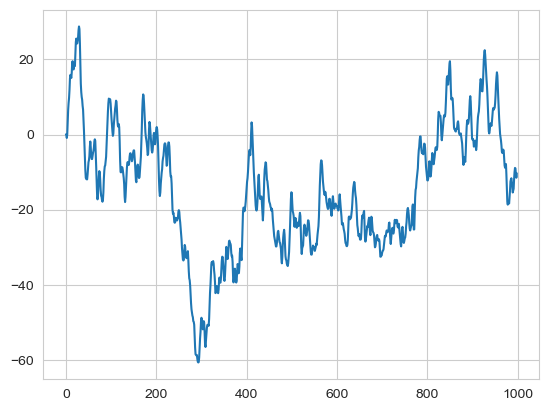

In [4]:
# Plot of the time series

plt.plot(range(999), y[1:])
plt.show()

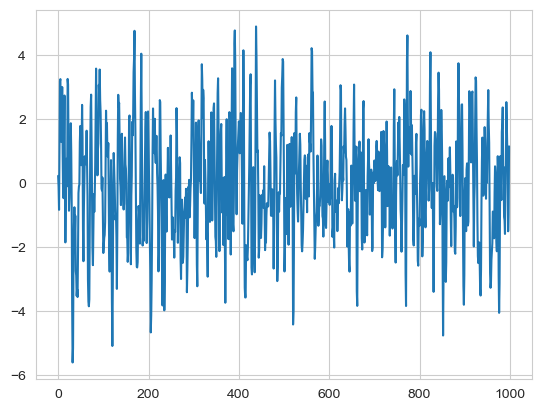

In [5]:
# plot of the first differences

plt.plot(range(999), y[1:] - y[:-1]) 
plt.show()

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

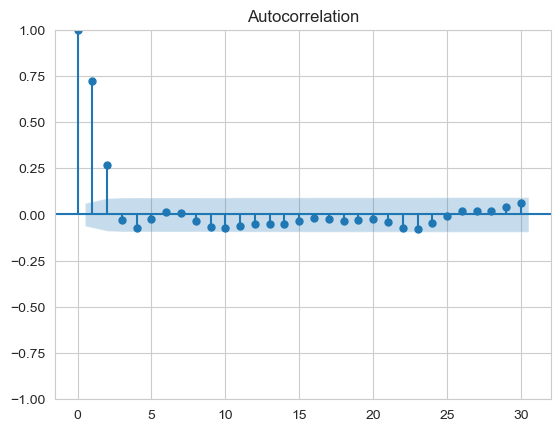

In [7]:
plot_acf(y[1:] - y[:-1])
plt.show()

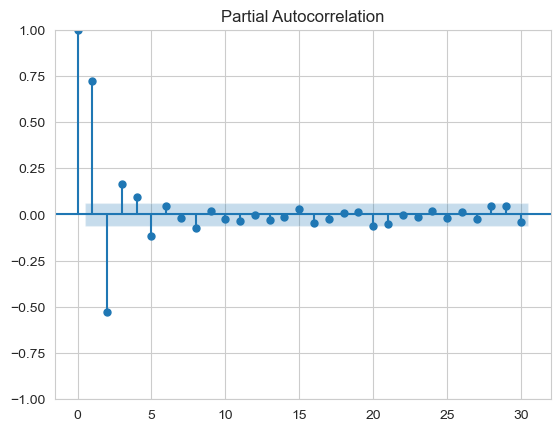

In [8]:
plot_pacf(y[1:] - y[:-1])
plt.show()

Remember that 

- the order of a pure MA model can be identified from the ACF plot, and it will appear to exponentially decay on the PACF plot.
- the order of a pure AR model can be identified from the PACF plot, and it will appear to exponentially decay on the ACF plot.

An ARMA model will have some combination of these and this can muddle identification of the hyperparameters from these plots.  In practice hyperparameter selection is usually done automatically either in cross validation or by selecting the model with the lowest [Akaike information criterion (AIC)](https://en.wikipedia.org/wiki/Akaike_information_criterion).  However these plots can still be useful, as we will see a bit later when we do some forecasting on real data.

We can use AIC to find the optimal parameters using `auto_arima` from [pmdarima](https://alkaline-ml.com/pmdarima/). 


In [9]:
from pmdarima import auto_arima

In [10]:
auto_arima(y, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2806.430, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3921.630, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3187.758, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3184.560, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3919.665, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2814.784, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2844.524, Time=0.07 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2808.267, Time=0.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2808.236, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2930.507, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2808.699, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2832.857, Time=0.18 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2810.236, Time=0.38 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2804.436, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [11]:
# This is how we fit the model
model = sm.ARIMA(y, order = (2, 1, 2)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1397.218
Date:                Mon, 21 Oct 2024   AIC                           2804.436
Time:                        19:41:03   BIC                           2828.970
Sample:                             0   HQIC                          2813.761
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4510      0.078      5.755      0.000       0.297       0.605
ar.L2         -0.1954      0.060     -3.266      0.001      -0.313      -0.078
ma.L1          0.7489      0.073     10.219      0.000       0.605       0.893
ma.L2          0.4384      0.049      8.947      0.000       0.342       0.534
sigma2         0.9586      0.042     22.591      0.000       0.875       1.042
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.81
Prob(Q):                              1.00   Prob(JB):                         0.15
Heteroskedasticity (H):               0.87   Skew:                             0.14
Prob(H) (two-sided):                  0.21   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
# to generate new predictions:
model.forecast(10)

array([-8.33051926, -7.05104542, -6.86640364, -7.03318748, -7.14449666,
       -7.16210294, -7.14828941, -7.13861826, -7.13695611, -7.13809658])

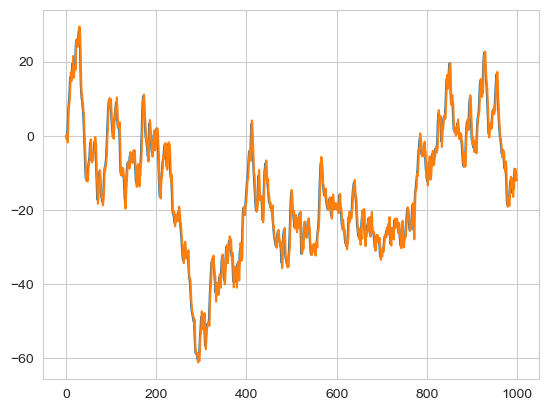

In [13]:
# to see the fit on the training data
plt.plot(range(999), y[1:])
plt.plot(range(1000), model.fittedvalues)
plt.show()

If you wanted to instead fit a SARIMA model the code would look like this:

```python
    model = sm.ARIMA(y, order = (p, d, q), seasonal_order=(P, D, Q, s)).fit()
```

If you wanted to do regression with SARIMA errors

$$
y = X \beta + \textrm{SARIMA}((p,d,q),(P,D,Q,s))
$$

the code looks like this:

```python
    model = sm.ARIMA(y, exog = X, order = (p, d, q), seasonal_order=(P, D, Q, s)).fit()
```

WARNING:  Please note that ARIMA models are best suited to "relatively short" time horizons.  The $\operatorname{MA}(q)$ part can only impact the forecast for $q$ time steps.  The $\operatorname{AR}(p)$ part of the forecast will continue to impact the forecast at all future times, but with an exponentially decreasing impact.

So we should expect to see an $\operatorname{ARIMA}(p,0,q)$ forecast converging to the gaussian white noise model ( converging to a constant forecast), and an $\operatorname{ARIMA}(p,1,q)$ forecast converging to a random walk with drift model ( converging to a linear forecast).

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.  Modified by Steven Gubkin 2024.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)